### chapter 4 - training models

In [13]:

import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [1]:
from pathlib import Path

IMAGES_PATH = Path() / 'images'/'training_linear_models'
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig (fig_id, tight_layout = True, fig_extension = 'png', resolution = 300):
    path = IMAGES_PATH / f'{fig_id}.{fig_extension}'
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format= fig_extension, dpi = resolution)

## Linear regression

### The normal equation 

In [2]:
import numpy as np

np.random.seed(42)
m = 100
X = 2 *np.random.rand(m,1)
y = 4 + 3 * X + np.random.randn(m, 1)

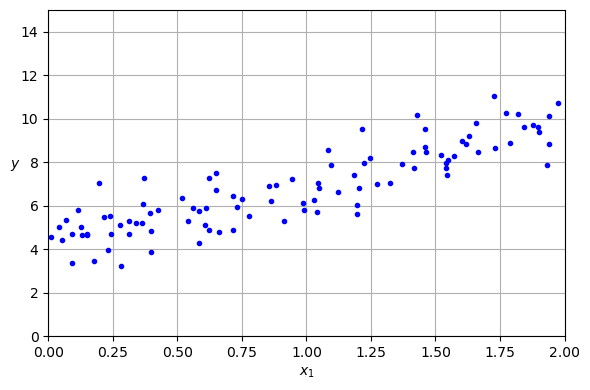

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$')
plt.ylabel('$y$',rotation=0)
plt.axis([0,2,0,15])
plt.grid()
save_fig('generated_data_plot')
plt.show()

In [ ]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [ ]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [ ]:
X_new = np.array([[0],[2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

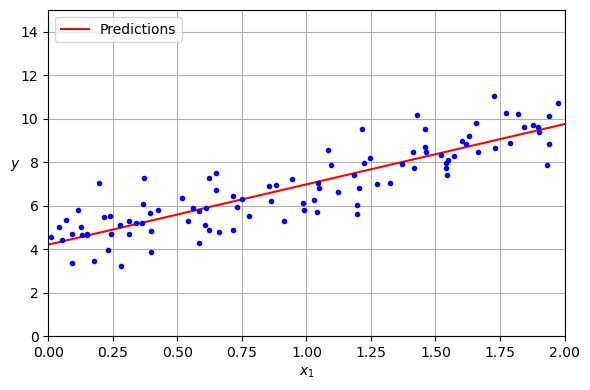

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(X_new, y_predict,'r-', label = 'Predictions')
plt.plot(X, y, 'b.')

plt.xlabel('$x_1$')
plt.ylabel('$y$',rotation=0)
plt.axis([0,2,0,15])
plt.grid()
plt.legend(loc='upper left')
save_fig('linear_model_predictions_plot')

plt.show()

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [9]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [ ]:
theta_best_svd , residuals, rank, s = np.linalg.lstsq(X_b,y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

this function computes X+y where X+ is the pseudoinverse of X (Moore-Penrose inverse).Use np.linalg.pinv() to compute the pseudoinverse directly

In [11]:
np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])

## Gradient descent

#### Batch gradient descent

In [ ]:
eta = 0.1
n_epochs = 1000
m = len(X_b)

np.random.seed(42)
theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta -y)
    theta = theta - eta * gradients

In [ ]:
X_b.shape , theta.shape, y.shape

((100, 2), (2, 1), (100, 1))

In [ ]:
theta

array([[4.21509616],
       [2.77011339]])

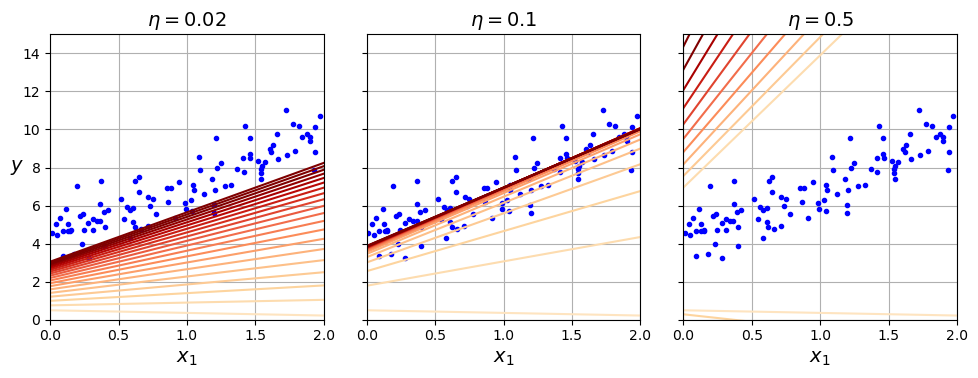

In [ ]:
import matplotlib as mpl

def plot_gradient_descent(theta, eta):
    m = len(X_b)
    plt.plot(X,y,'b.')
    n_epochs = 1000
    n_shown = 20
    theta_path = []
    for epoch in range(n_epochs):
        if epoch < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch/ n_shown +0.15))
            plt.plot(X_new, y_predict,linestyle='solid',color=color)
        gradients = 2 / m * X_b.T @ (X_b @ theta -y)
        theta = theta - eta * gradients
        theta_path.append(theta)
    plt.xlabel("$x_1$")
    plt.axis([0, 2, 0, 15])
    plt.grid()
    plt.title(fr"$\eta = {eta}$")
    return theta_path

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0)
plt.subplot(132)
theta_path_bgd = plot_gradient_descent(theta, eta=0.1)
plt.gca().axes.yaxis.set_ticklabels([])
plt.subplot(133)
plt.gca().axes.yaxis.set_ticklabels([])
plot_gradient_descent(theta, eta=0.5)
save_fig("gradient_descent_plot")
plt.show()
            

#### Stochastic gradient descent

In [30]:
theta_path_sgd = []

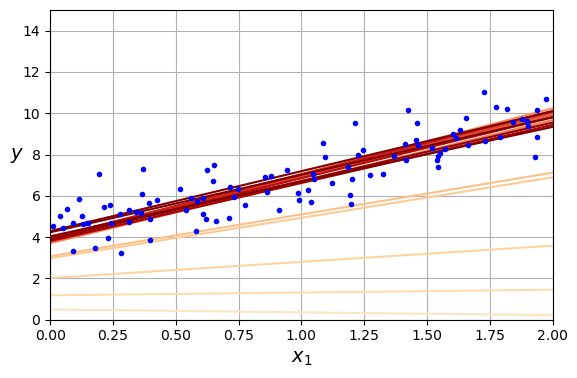

In [31]:
n_epochs = 50
t0,t1 = 5,50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t+t1)

np.random.seed(42)
theta = np.random.randn(2,1)

n_shown = 20
plt.figure(figsize=(6,4))

for epoch in range(n_epochs):
    for iteration in range(m):

        if epoch == 0 and iteration < n_shown :
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(iteration / n_shown +0.15))
            plt.plot(X_new, y_predict,color=color)
        
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index+1]
        yi = y[random_index : random_index+1]
        gradients = 2 * xi.T @ (xi @ theta - yi) # for sgd do not divide by m
        eta = learning_schedule( epoch * m +iteration)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)

plt.plot(X,y, 'b.')
plt.xlabel('$x_1$')
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
save_fig("sgd_plot")
plt.show()

In [32]:
theta

array([[4.21076011],
       [2.74856079]])

In [43]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01,
                       n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel())


SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [44]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

#### Mini batch gradient descent

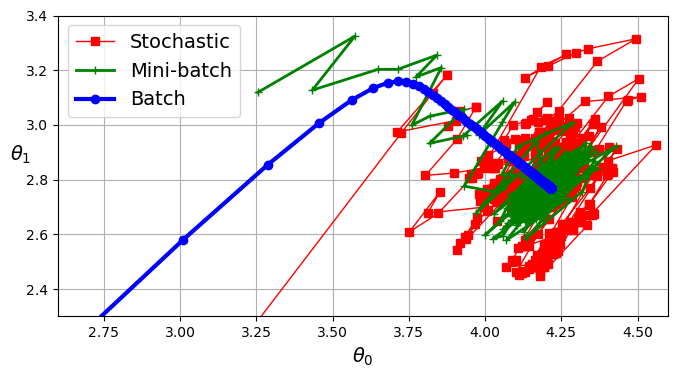

In [64]:
from math import ceil

n_epochs = 50
minibatch_size = 20
n_batches_per_epoch = ceil(m/ minibatch_size)

np.random.seed(42)
theta = np.random.randn(2,1)

t0,t1 = 200, 1000

def learning_schedule(t):
    return t0 / (t+t1)

theta_path_mgd = []
for epoch in range (n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for iteration in range(0,n_batches_per_epoch):
        idx = iteration * minibatch_size
        xi = X_b_shuffled[idx: idx+minibatch_size]
        yi = y_shuffled[idx: idx+minibatch_size]
        gradients = 2/minibatch_size * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(iteration)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:,0],theta_path_sgd[:,1], 'r-s',linewidth=1,
         label='Stochastic')

plt.plot(theta_path_mgd[:,0],theta_path_mgd[:,1], 'g-+',linewidth=2,
         label='Mini-batch')

plt.plot(theta_path_bgd[:,0],theta_path_bgd[:,1], 'b-o',linewidth=3,
         label='Batch')

plt.grid()
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$',rotation=0)
plt.legend(loc='upper left')
plt.axis([2.6, 4.6, 2.3, 3.4])
save_fig('gradient_descent_paths_plot')
plt.show()

### Polynomial regression

In [65]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m,1)

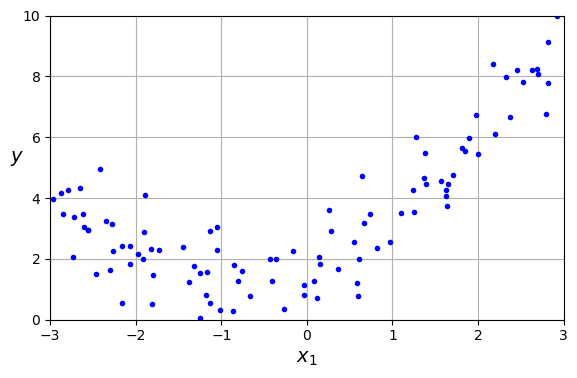

In [66]:
plt.figure(figsize=(6,4))
plt.plot(X,y,'b.')
plt.xlabel('$x_1$')
plt.ylabel('$y$',rotation=0)
plt.axis([-3,3,0,10])
plt.grid()
save_fig('quadratic_data_plot')
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [71]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [73]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_ , lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

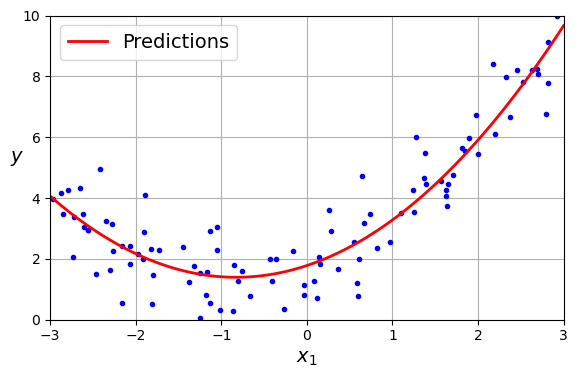

In [74]:
X_new = np.linspace(-3,3,100).reshape(100,1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(6,4))
plt.plot(X,y,'b.')
plt.plot(X_new, y_new, 'r-',linewidth =2, label='Predictions')
plt.xlabel('$x_1$')
plt.ylabel('$y$',rotation=0)
plt.legend(loc='upper left')
plt.grid()
plt.axis([-3,3,0,10])
save_fig('quadratic_predictions_plot')
plt.show()

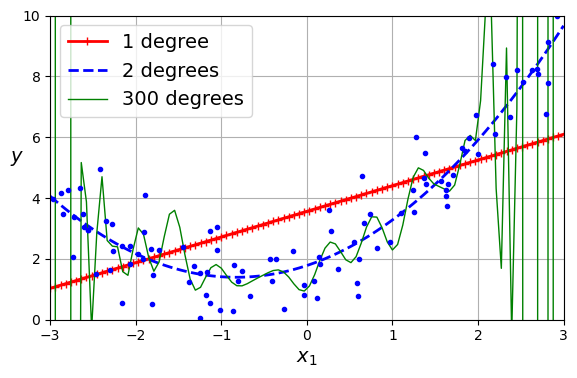

In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

plt.figure(figsize=(6,4))
for style, width , degree in (('r-+',2,1),('b--',2,2),('g-',1,300)):
    polybig_features = PolynomialFeatures(degree=degree,include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = make_pipeline(polybig_features, std_scaler, lin_reg)
    polynomial_regression.fit(X,y)
    y_newbig = polynomial_regression.predict(X_new)
    label = f"{degree} degree{'s' if degree > 1 else ''}"
    plt.plot(X_new,y_newbig,style,label=label,linewidth = width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
save_fig("high_degree_polynomials_plot")
plt.show()

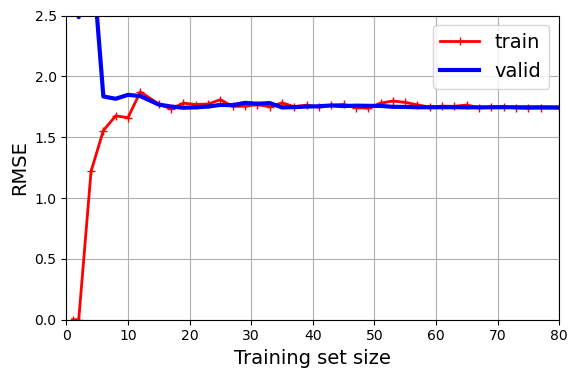

In [79]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(),X,y, train_sizes=np.linspace(0.01,1.0,40),cv=5,
    scoring='neg_root_mean_squared_error'
)
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

# extra code – beautifies and saves Figure 4–15
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([0, 80, 0, 2.5])
save_fig("underfitting_learning_curves_plot")


In [84]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression()
)

train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression,X,y, train_sizes=np.linspace(0.01,1.0,40),cv=5,
    scoring='neg_root_mean_squared_error'
)

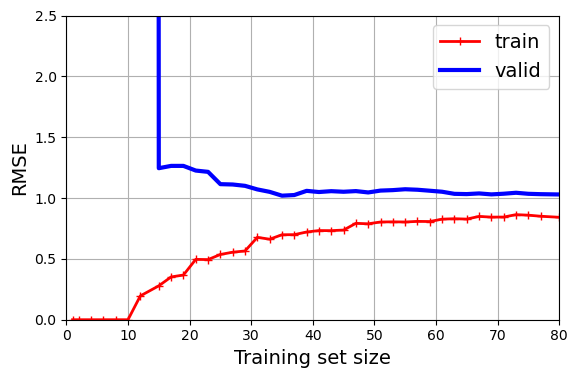

In [85]:
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.legend(loc="upper right")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.axis([0, 80, 0, 2.5])
save_fig("learning_curves_plot")
plt.show()

### Regularized linear models


#### Ridge regression

In [86]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

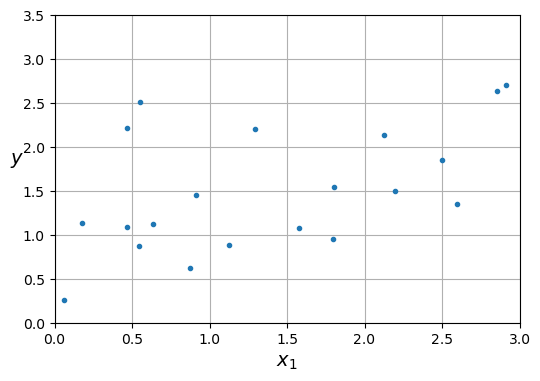

In [88]:
plt.figure(figsize=(6,4))
plt.plot(X,y,'.')
plt.xlabel('$x_1$')
plt.ylabel('$y$',rotation=0)
plt.grid()
plt.axis([0.0,3.0,0.0,3.5])
plt.show()

In [90]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1, solver='cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([1.55325833])

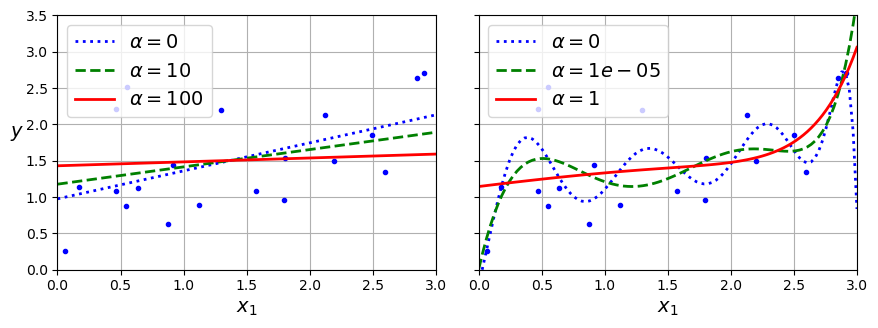

In [91]:
def plot_model(model_class, polynomial, alphas, **model_kwargs):
    plt.plot(X,y ,'b.',linewidth=3)
    for alpha, style in zip(alphas, ('b:','g--','r-')):
        if alpha>0:
            model = model_class(alpha,**model_kwargs)
        else:
            model = LinearRegression()
        if polynomial:
            model = make_pipeline(
                PolynomialFeatures(degree=10, include_bias=False),
                StandardScaler(),
                model)
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        plt.plot(X_new, y_new_regul, style, linewidth=2,
                 label=fr"$\alpha = {alpha}$")
    plt.legend(loc="upper left")
    plt.xlabel("$x_1$")
    plt.axis([0, 3, 0, 3.5])
    plt.grid()

plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$  ", rotation=0)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.gca().axes.yaxis.set_ticklabels([])
save_fig("ridge_regression_plot")
plt.show()





In [92]:
sgd_reg = SGDRegressor(penalty='l2',alpha=0.1/m, tol=None,
                       max_iter=1000,eta0=0.01, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.55302613])

In [98]:
ridge_reg = Ridge(alpha=0.1, solver='sag',random_state=42)
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([1.55326019])

In [100]:
alpha = 0.1
A = np.array([[0.,0.],[0.,1]])
X_b = np.c_[np.ones(m),X]
np.linalg.inv(X_b.T @ X_b +alpha * A) @ X_b.T @ y

array([[0.97898394],
       [0.3828496 ]])

In [101]:
ridge_reg.intercept_ , ridge_reg.coef_

(array([0.97896386]), array([0.38286422]))